<a href="https://colab.research.google.com/github/Mr-Pacheco/ML_titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Machine Learning
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Reading the csv
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv('gender_submission.csv')

In [5]:
print(gender.shape)
gender.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
gender['Survived']
combine = pd.merge(gender, test)

In [9]:
print(combine.shape)
combine.head()

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
all_data = pd.merge(combine, train, how = 'outer')

In [11]:
print(all_data.shape)
all_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
all_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [13]:
all_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
all_data['Cabin'].value_counts(dropna = False)

NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
C28                   1
A11                   1
E10                   1
T                     1
D49                   1
Name: Cabin, Length: 187, dtype: int64

In [15]:
df_cleaned = all_data.drop('Cabin', axis = 1)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [16]:
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [17]:
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df_cleaned = df_cleaned.drop(['PassengerId', 'Ticket'], axis = 1)
df_cleaned.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,1043.000000,1043.000000,1043,1043,1043.000000,1043.000000,1043.000000,1043.000000,1043
unique,NaN,NaN,1041,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,2,657,NaN,NaN,NaN,NaN,781
mean,0.397891,2.209012,NaN,NaN,29.813202,0.504314,0.421860,36.603024,NaN
std,0.489697,0.840685,NaN,NaN,14.366254,0.913080,0.840655,55.753648,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,15.750000,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,1.000000,35.077100,NaN


In [19]:
df_cleaned['n_sex'] = df_cleaned['Sex'].replace({'male': 1, 'female': 0})
df_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [20]:
def group(value):
  if int(value) <= 10:
    return 1
  if 10 < int(value) <= 20:
    return 2
  if 20 < int(value) <= 30:
    return 3
  if 30 < int(value) <= 40:
    return 4
  if 40 < int(value) <= 50:
    return 5
  if 50 < int(value) <= 60:
    return 6
  if 60 < int(value) <= 70:
    return 7
  if 70 < int(value) <= 80:
    return 8

df_cleaned['n_age'] = df_cleaned['Age'].apply(group)
df_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex,n_age
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,4
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,5
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,7
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,3
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,3


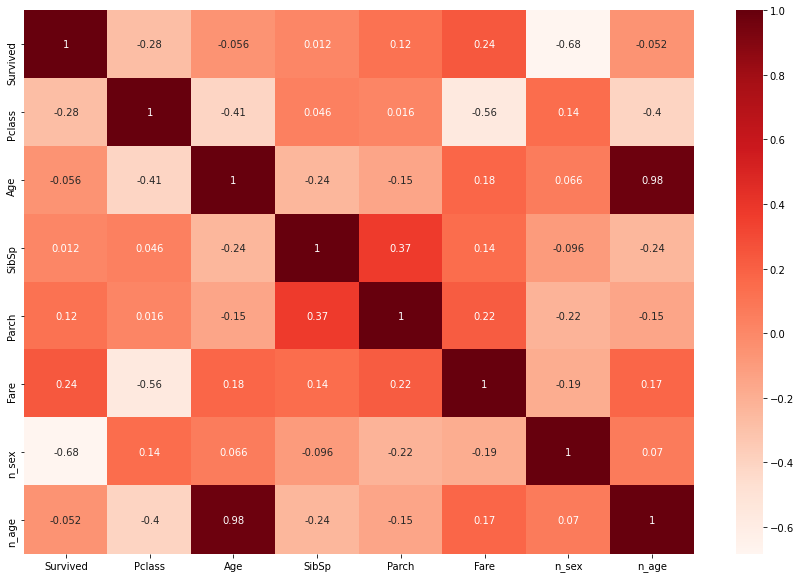

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Reds')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 100.0)

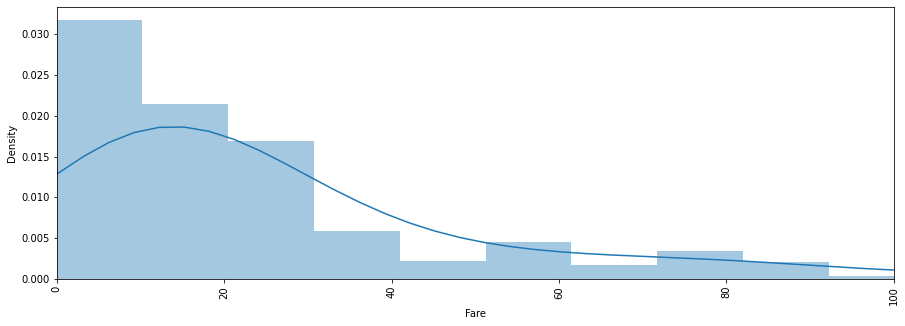

In [22]:
plt.figure(figsize=(15, 5))
grafico = sns.distplot(df_cleaned['Fare'])
grafico.tick_params(axis='x', rotation=90)
plt.xlim(0,100)

(0.0, 100.0)

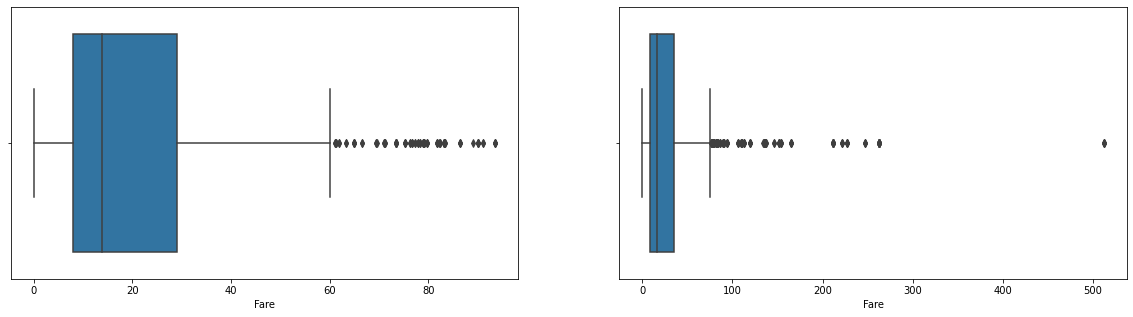

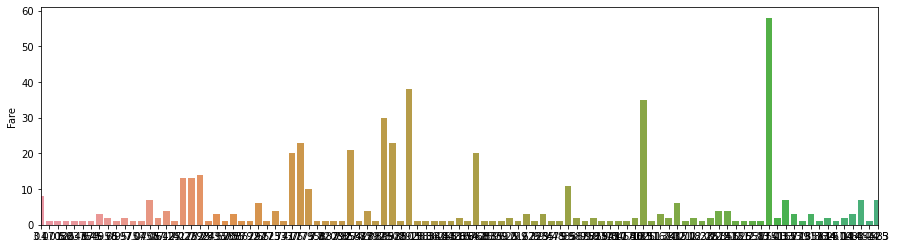

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,5))
sns.boxplot(x = df_cleaned[df_cleaned['Fare']<100]['Fare'], ax = ax1,)
sns.boxplot(x = df_cleaned['Fare'], ax = ax2)

plt.figure(figsize=(15, 4))
sns.barplot(x=df_cleaned['Fare'].value_counts().index, y=df_cleaned['Fare'].value_counts())
plt.xlim(0, 100)

In [24]:
def group_fare(value):
  if int(value) <= 10:
    return 1
  if 10 < value < 15:
    return 2
  if 15 <= value < 25:
    return 3
  if 25 <= value < 40:
    return 4
  if 40 <= value < 60:
    return 5
  if 60 <= value < 100:
    return 6
  if 100 <= value:
    return 7

df_cleaned['n_fare'] = df_cleaned['Fare'].apply(group_fare)
df_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex,n_age,n_fare
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,4,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,5,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,7,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,3,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,3,2


(0.0, 7.0)

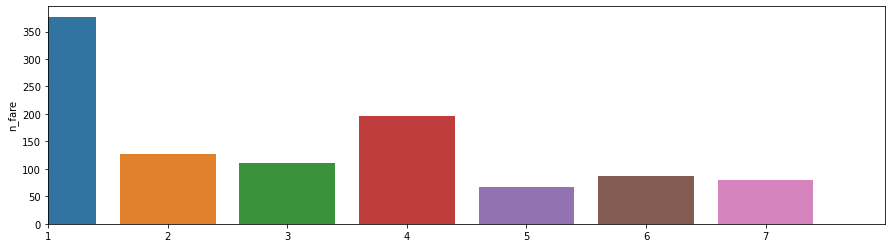

In [25]:
plt.figure(figsize=(15, 4))
sns.barplot(x=df_cleaned['n_fare'].value_counts().index, y=df_cleaned['n_fare'].value_counts())
plt.xlim(0, 7)

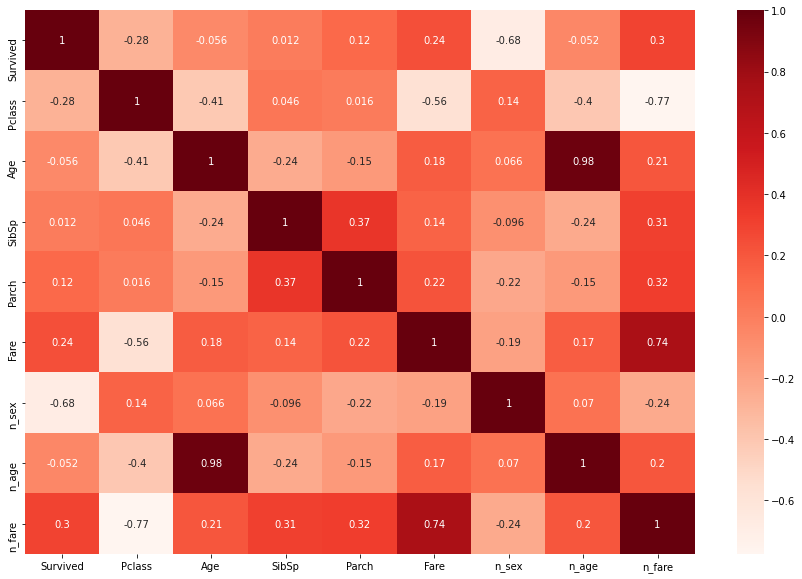

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Reds')

# Dealing with text column

In [27]:
def extract_feature(dataset):
    dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    dataset = dataset.rename(columns={"Name": "Title"})
    dataset['Title'] = dataset['Title'].replace(
        ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
         'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    return dataset

In [28]:
df_cleaned = extract_feature(df_cleaned)

In [29]:
df_cleaned.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex,n_age,n_fare
0,0,3,Mr,male,34.5,0,0,7.8292,Q,1,4,1
1,1,3,Mrs,female,47.0,1,0,7.0000,S,0,5,1
2,0,2,Mr,male,62.0,0,0,9.6875,Q,1,7,1
3,0,3,Mr,male,27.0,0,0,8.6625,S,1,3,1
4,1,3,Mrs,female,22.0,1,1,12.2875,S,0,3,2


# Enconding

In [217]:
df_god = df_cleaned[['Survived', 'Pclass','Title','n_sex','Age','SibSp', 'Parch','Embarked','n_fare']]
df_god.head()

,Survived,Pclass,Title,n_sex,Age,SibSp,Parch,Embarked,n_fare
0,0,3,Mr,1,34.5,0,0,Q,1
1,1,3,Mrs,0,47.0,1,0,S,1
2,0,2,Mr,1,62.0,0,0,Q,1
3,0,3,Mr,1,27.0,0,0,S,1
4,1,3,Mrs,0,22.0,1,1,S,2


In [218]:
column_categories = ['Title', 'Embarked','Pclass','SibSp','Parch', 'n_fare']
df_god_cod = pd.get_dummies(data = df_god, columns = column_categories)
display(df_god_cod.head())

,Survived,n_sex,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,n_fare_1,n_fare_2,n_fare_3,n_fare_4,n_fare_5,n_fare_6,n_fare_7
0,0,1,34.5,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,47.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,62.0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,27.0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,22.0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [219]:
# plt.figure(figsize = (15,9))
# sns.heatmap(df_god_cod.corr(), annot = True, cmap = 'Reds')

In [220]:
def assess_model(model_name, y_test, forecast):
    r2 = r2_score(y_test, forecast)
    RSME = np.sqrt(mean_squared_error(y_test, forecast))
    return f'Modelo {model_name}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

In [221]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }

In [222]:
y = df_god_cod['Survived']
X = df_god_cod.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
for model_name, model in modelos.items():
    #training
    model.fit(X_train, y_train)
    #test
    forecast = model.predict(X_test)
    model.score(X_train, y_train)
    print(assess_model(model_name, y_test, forecast))

Modelo RandomForest:
R²:47.66%
RSME:0.36
Modelo LinearRegression:
R²:60.59%
RSME:0.31
Modelo ExtraTrees:
R²:34.64%
RSME:0.40


In [225]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

96.8

In [226]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error

# # Define model. Specify a number for random_state to ensure same results each run
# model = DecisionTreeRegressor(random_state=1)

# # Fit model
# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# print(mean_absolute_error(y_test, predictions))


In [39]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.tree import DecisionTreeRegressor

# def get_mae(max_leaf_nodes, train_X, X_test, train_y, y_test):
#     model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#     model.fit(train_X, train_y)
#     preds_val = model.predict(X_test)
#     mae = mean_absolute_error(y_test, preds_val)
#     return(mae)

In [40]:
# # compare MAE with differing values of max_leaf_nodes
# for max_leaf_nodes in [5, 50, 500, 5000]:
#     my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
#     print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

In [41]:
# # Code you have previously used to load data
# import pandas as pd
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor


# # Path of the file to read
# iowa_file_path = '../input/home-data-for-ml-course/train.csv'

# home_data = pd.read_csv(iowa_file_path)
# # Create target object and call it y
# y = home_data.SalePrice
# # Create X
# features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# X = home_data[features]

# # Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# # Specify Model
# iowa_model = DecisionTreeRegressor(random_state=1)
# # Fit Model
# iowa_model.fit(train_X, train_y)

# # Make validation predictions and calculate mean absolute error
# val_predictions = iowa_model.predict(val_X)
# val_mae = mean_absolute_error(val_predictions, val_y)
# print("Validation MAE: {:,.0f}".format(val_mae))

In [105]:
df_god.describe(include='all')

,Survived,Pclass,Title,n_sex,Age,SibSp,Parch,Embarked,n_fare
count,1043.000000,1043.000000,1043,1043.000000,1043.000000,1043.000000,1043.000000,1043,1043.000000
unique,NaN,NaN,5,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,Mr,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,NaN,580,NaN,NaN,NaN,NaN,781,NaN
mean,0.397891,2.209012,NaN,0.629914,29.813202,0.504314,0.421860,NaN,3.024928
std,0.489697,0.840685,NaN,0.483059,14.366254,0.913080,0.840655,NaN,1.994559
min,0.000000,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN,1.000000
25%,0.000000,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,NaN,1.000000
50%,0.000000,2.000000,NaN,1.000000,28.000000,0.000000,0.000000,NaN,3.000000
75%,1.000000,3.000000,NaN,1.000000,39.000000,1.000000,1.000000,NaN,4.000000
